**Цель исследования**
В нашем распоряжении данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года.
Нам нужно провести исследование для международного магазина видеоигр: на исторических данных выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования** 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.

**1. Откроем файл с данными и изучим общую информацию.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
df = pd.read_csv('/datasets/games.csv', sep=',')

In [2]:
#Выведем первые 10 строк ДатаФрейма
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


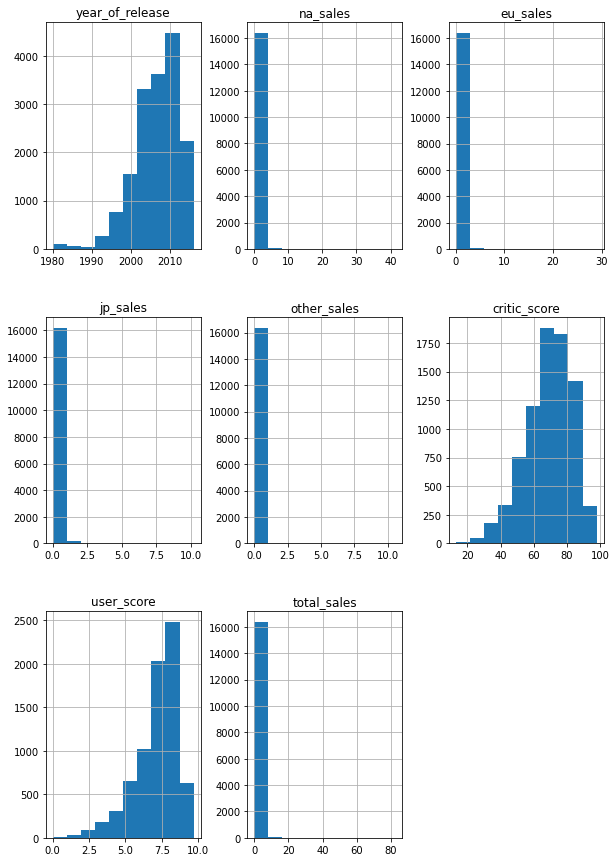

In [79]:
df.hist(figsize=(10, 15))
plt.show()

In [4]:
#Изучим общую информацию о столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [6]:
df['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

In [7]:
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [8]:
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [9]:
display(df['User_Score'].value_counts())
#в данных присутствует абривиатура "tbd" значает "to be defined" - предстоит определить
#можно утверждать, что в данный момент это пропуск данных поэтому сразу заменим на их на NaN.
df.loc[df['User_Score'] == 'tbd', 'User_Score'] = float('nan')

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
9.6       2
0.2       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

In [10]:
df['Critic_Score'].value_counts()
df['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

**2. Предобработка данных.**

In [76]:
#Приводим все названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()


In [78]:
#проверяем количество пропусков в данных 
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
total_sales           0
dtype: int64

In [77]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.500000
user_score,54.600000


In [13]:
#Удалим пропуски в столбце с названиями
df = df.dropna(subset=['name']).reset_index(drop=True)

In [14]:
#удалим строки с пропущенным годом релиза, этих значений около 1.7%, (~300 шт)
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

In [15]:
#проверяем количество пропусков в данных после удаления пропусков
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [16]:
#проверим данные на наличие явных дубликатов
df.duplicated().sum()

0

В столбце с рейтингом ESRB присутствуют пропуски в количестве 6766. Заменим их на аббревиатуру ND - не определен, а устаревшую аббревиатуру "K-A" изменим на современное обозначение "E" (этот рейтинг использовался до 1998 года, после он был переименован в E).

In [17]:
df['rating'] = df['rating'].fillna(value='ND')
df['rating'] = df['rating'].replace('K-A', 'E')

Преобразеум данные к нужному типу.
Год выпуска сохранен в формате int с дробной частью, хотя год не может быть не целым числом. Преведем его к целочисленному значению. В столбце user_score замененные на NaN тектовые значения приведем к дробным числам.

In [18]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['user_score'] = df['user_score'].astype(float)

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [19]:
#Создадим столбец с общими продажами total_sales и запишем туда сумму всех продаж по всем регионам.
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

**Вывод**: Мы привели имена столбцов к нижнему регистру, привели данные в двух столбцах к целочисленному типу и избавились от записей с критичными пропусками в данных - названием и годом выпуска, отредактировали данные с рейтингом игр, а также добавили новый столбец - суммарный объем продаж во всех регионах.

**3. Проведем исследовательский анализ данных**

**3.1** Посмотрим сколько игр выпускалось в разные годы.

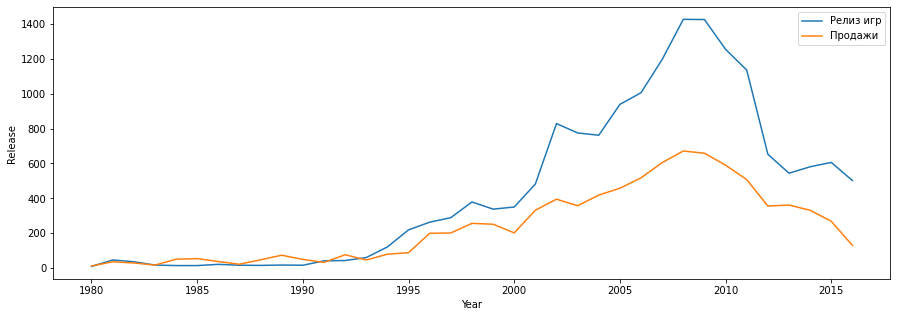

In [20]:
#построим общий график выхода игр и продаж по каждому году
plt.figure(figsize=(15,5))
plt.plot(df.groupby('year_of_release')['name'].count(), label='Релиз игр')
plt.plot(df.groupby('year_of_release')['total_sales'].sum(), label='Продажи')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Release')
plt.show()

In [21]:
#выведем таблицу количества выпущенных игр по годам
df.groupby('year_of_release')['name'].count().sort_values(ascending=False)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64

Вывод: В 1994 году наступает настоящий расцвет производства видеоигр, и буквально за 12 лет количество релизов достигает максимума - более чем 1400 в 2008-2009 годах. В 2006 году количествро выпущенных игр превысило отметку в 1000. 
До 1994 года количество релизов в год не превышало 100. Подем начинается в 1994 году, с началом развития игровой индустрии в 1990ггю. Можно связать с появлением CD-ROM, развитие аппаратных 3D технологии визуализации, появление интернета. Открытием в середине 1990-х первого учебного заведения, готовящего специалистов по разработке видео игр. DigiPen Institute of Technology открывается в Ванкувере в 1994 году.

**3.2** Посмотрим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

Так как до 1994 года количество релизов менее 100 в год и срок их выхода был около 30 лет назад, то можно эти данные считать устаревшими и не рассматривать дальше.

In [22]:
# создадим новую таблицу с данными от 94 года и позднее
df_94 = df[df['year_of_release'] > 1993]

In [23]:
#Создадим сводную таблицу и отфильтруем те платформы, на которых вышло хотя бы 50 игр.
#Подсветим таблицу так, чтобы увидеть таймлайны разных платформ.
platform_releases = df_94.pivot_table(index='platform', 
                                      values='total_sales', 
                                      columns = 'year_of_release', 
                                      aggfunc = 'count', 
                                      fill_value=0, 
                                      margins=True).reset_index()
platform_releases = platform_releases[:-1]
platform_releases = platform_releases.rename_axis('index',  axis="columns")

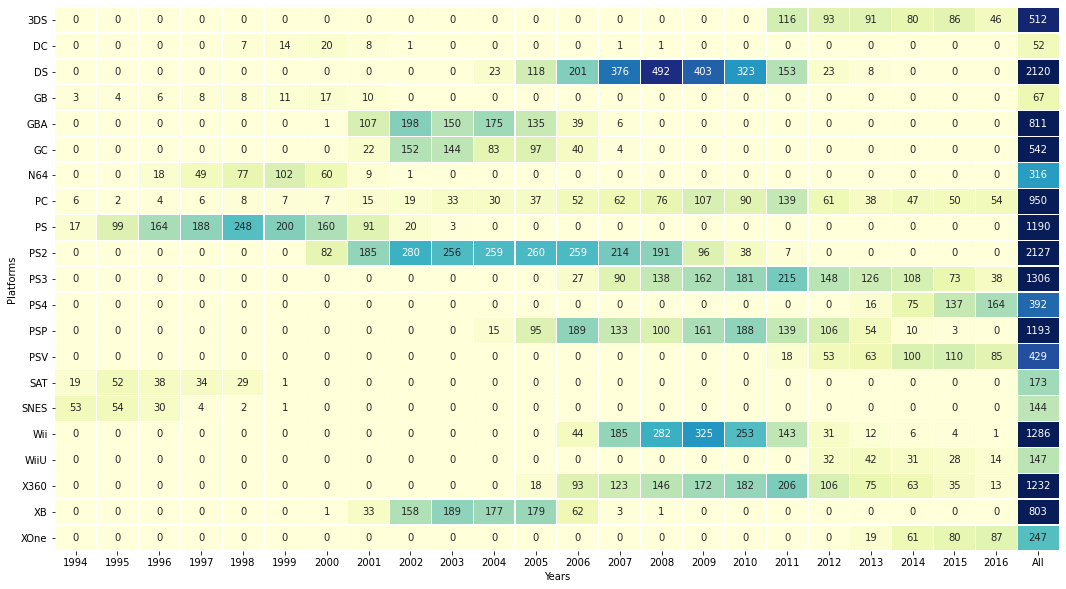

In [24]:
#Построим HeatMap по отфильтрованной сводной таблице
platform_releases_heatmap = platform_releases.query('All > 50').set_index('platform')
plt.figure(figsize=(18, 10))
sns.heatmap(platform_releases_heatmap, annot=True, fmt="d", cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.xlabel('Years')
plt.ylabel('Platforms')
plt.show()

Из графика мы видим что:
у PlayStation сроки между выходом новых консолей примерно 6-7 лет, у XBox сроки выхода между новыми консолями примерно 6-8 лет,
PC +- стабилен, наблюдается плавный рост и скачек в 2009году.Wii аналогично со всеми описанными платформами примерно 6 лет.
DS между так же 6-7 лет, но у него самая высокая попуулярность в свое время и самое большое количество игр в год(2008).




Построим аналогичный heatmap только уже с объемами продаж, возьмем данные где продано более 10млн копий

In [25]:
platform_sales = df_94.pivot_table(index='platform', 
                                      values='total_sales', 
                                      columns = 'year_of_release', 
                                      aggfunc = 'sum', 
                                      fill_value=0, 
                                      margins=True).reset_index()
platform_sales = platform_sales[:-1]
platform_sales = platform_sales.rename_axis('index',  axis="columns")

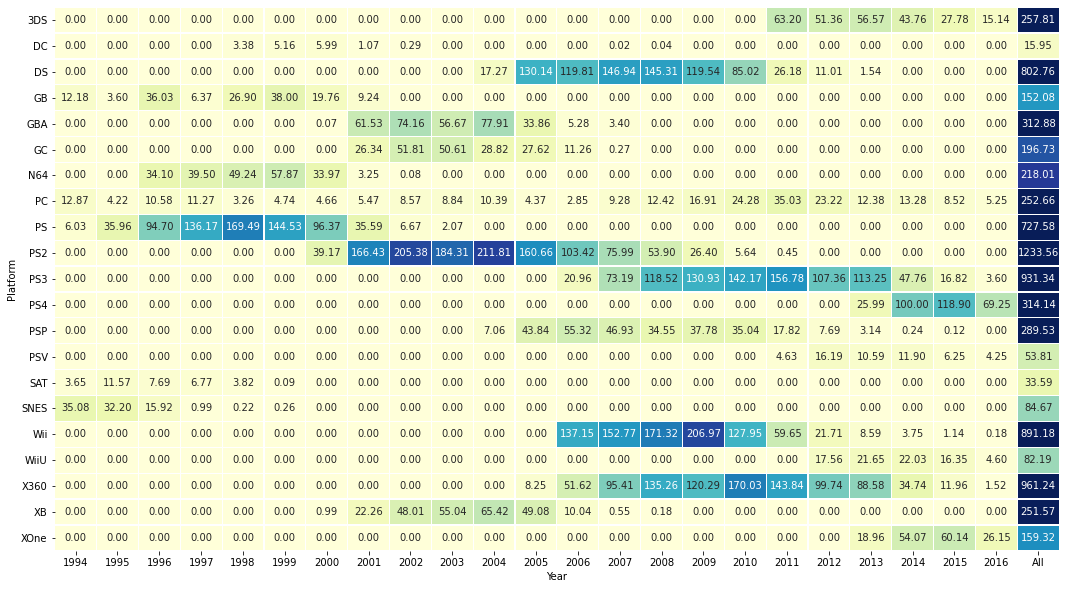

In [26]:
platform_sales_heatmap = platform_sales.query('All > 10').set_index('platform')
plt.figure(figsize=(18, 10))
sns.heatmap(platform_sales_heatmap, annot=True, fmt=".2f", cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.xlabel('Year')
plt.ylabel('Platform')
plt.show()

Сформируем свой топ платформ опираясь на полученные данные. Составим топ лист для количества выпущенных игр и количества проданных копий, и просто сложим 2 эти топа вместе. 

In [27]:
# топ платформ по количеству выпущенных игр
platforms_top_releases = list(platform_releases.sort_values(by='All', ascending=False)['platform'].head(10))
platform_releases.sort_values(by='All', ascending=False)[['platform', 'All']].head(10)

index,platform,All
14,PS2,2127
3,DS,2120
15,PS3,1306
24,Wii,1286
26,X360,1232
17,PSP,1193
13,PS,1190
11,PC,950
5,GBA,811
27,XB,803


In [28]:
# топ платформ по количеству проданных копий
platforms_top_sales = list(platform_sales.sort_values(by='All', ascending=False)['platform'].head(10))
platform_sales.sort_values(by='All', ascending=False)[['platform', 'All']].head(10)

index,platform,All
14,PS2,1233.56
26,X360,961.24
15,PS3,931.34
24,Wii,891.18
3,DS,802.76
13,PS,727.58
16,PS4,314.14
5,GBA,312.88
17,PSP,289.53
1,3DS,257.81


In [29]:
top_platforms = list(set(platforms_top_releases + platforms_top_sales))

Из данных видно, что лучшая платформа всех времен это PS2... эх ностальджи.)
Списки платформ по продажам и релизам практически совпадают, объеденим их и построим графики выхода и продаж игр по годам.

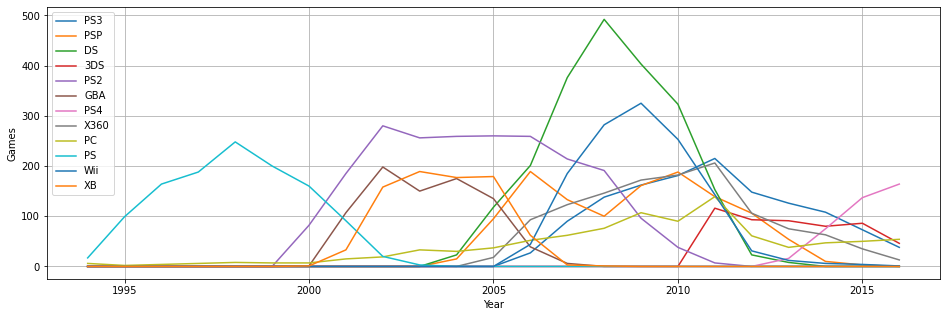

In [30]:
# графики выходов игр на самых популярных платформах
plt.figure(figsize=(16, 5))
for i in top_platforms:
    plt.plot(list(platform_releases.columns[1:-1]), 
             platform_releases.loc[platform_releases['platform'] == i, list(platform_releases.columns[1:-1])].T, label=i)
plt.xlabel('Year')
plt.ylabel('Games')
plt.grid()
plt.legend(loc='upper left')
plt.show()

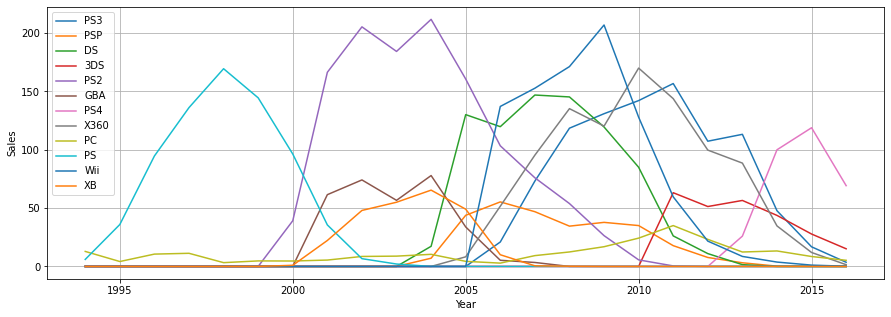

In [31]:
# графики продаж игр на самых популярных платформах
plt.figure(figsize=(15, 5))
for i in top_platforms:
    plt.plot(list(platform_sales.columns[1:-1]), 
             platform_sales.loc[platform_sales['platform'] == i, list(platform_sales.columns[1:-1])].T, label=i)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid()
plt.legend(loc='upper left')
plt.show()

Выберем потенциально прибыльные платформы. Как критерий возьмем условия, что были продажи и релизы последний год(если не было, то скорее всего они прекратили поддержку данной платформы окончательно), а так же платформы старше 10 лет(которые доживают свои последние деньки). Самым оптимальным вариантом для рассмотрения это те платформы которые вышли не более 5 лет назад.

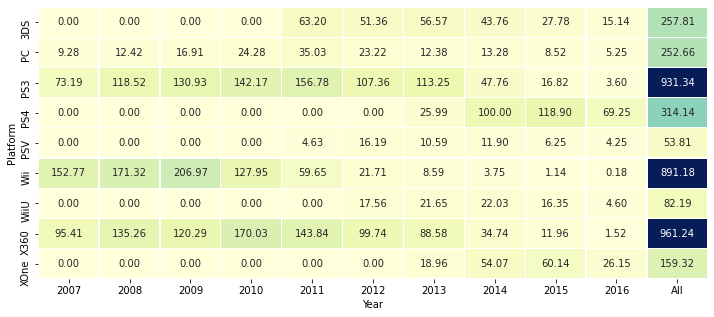

In [32]:
# посмотрим, у каких платформ были хотя бы какие-то продажи в 2016 году 
platform_sales_heatmap = platform_sales.loc[platform_sales[2016] != 0, 
                   ['platform', 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 'All']].set_index('platform')

plt.figure(figsize=(12, 5))
sns.heatmap(platform_sales_heatmap, annot=True, fmt=".2f", cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.xlabel('Year')
plt.ylabel('Platform')
plt.show()

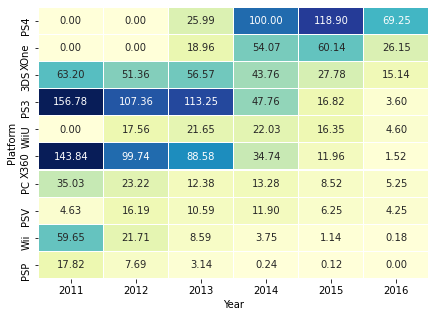

In [33]:
# посмотрим на 2015г тк данные за 2016г неполные
platform_sales_heatmap = platform_sales.sort_values(by=2015, ascending=False)[['platform', 2011, 2012, 2013, 2014, 2015, 2016]].head(10).set_index('platform')

plt.figure(figsize=(7, 5))
sns.heatmap(platform_sales_heatmap, annot=True, fmt=".2f", cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.xlabel('Year')
plt.ylabel('Platform')
plt.show()

Сделаем вывод, что PlayStation 4, WiiU, XBox One в 2015г находятся на подъеме, а Nintendo 3DS, XBox 360, PlayStation 3 и PlayStation Vita миновали пик популярности, Wii и PSP ушли в небытие, а ПК стабильно остается на своем уровне. Для дальнейшего анализа оставим наиболее перспективные платформы (PlayStation 4, XBox One и PC), и будем опираться на данные с 2014 года, как наиболее актуальные (год, когда все платформы, принятые нами как актуальные, уже вышли).

In [34]:
df_actual = df.query('platform in ["PS4", "XOne", "PC"] and year_of_release > 2012') 

In [35]:
# сохраним список актуальных платформ на будущее и обрежем данные 2013 годом
actual_platforms = ["PS4", "XOne", "PC"]
df_actual = df.query('year_of_release > 2012')

Построим диаграммы размаха для выбранных платформ за выбранное время.

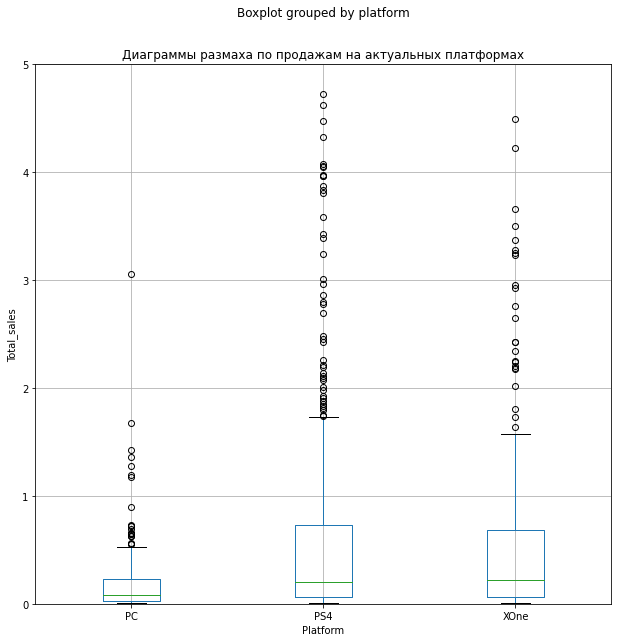

In [59]:
(df_actual.query('platform in @actual_platforms')[['platform', 'name', 'total_sales']]
 .boxplot(column='total_sales', by='platform', figsize=(10,10))
)
plt.xlabel('Platform')
plt.ylabel('Total_sales')
plt.title('Диаграммы размаха по продажам на актуальных платформах')
#plt.ylim(0, 10)
plt.ylim(0, 5)
plt.show()

In [37]:
# построим табличку по этим данным
display(df_actual.query('platform in @actual_platforms')
        .pivot_table(index='platform', values='total_sales', aggfunc=['sum', 'mean', 'median', 'std', 'count'])
        .sort_values(('median', 'total_sales'), ascending=False))

,sum,mean,median,std,count
,total_sales,total_sales,total_sales,total_sales,total_sales
platform,,,,,
XOne,159.32,0.645020,0.22,1.036139,247
PS4,314.14,0.801378,0.20,1.609456,392
PC,39.43,0.208624,0.08,0.352304,189


* Лидером продаж является PlayStation 4, но и размах продаж по годам у нее самый большой - во второй год с момента выпуска ее популярность выросла почти в 2 раза. 

* ПК является самой стабильной платформой. Размах самый узкий. Среднее число продаж игр для ПК самое низкое и доля бестселлеров самая маленькая. 

* Медианные продажи по каждой из платформ заметно меньше 1 млн, но выбросы показывают, что у каждой из платформ есть свои эксклюзивы которые очень популярны. Доля таких успешных проектов выше всего у PlayStation 4 и XBox one - это видно и по большему среднему значению числа продаж.

* Выбросы на диаграмме размаха это скорее всего какие-то ААА проекты. У XOne большой бокс, длинный ус и мало выбросов. Вероятно на XOne покупают хорошо покупают самые разные игры(медиана выше чем у PS4).

**Проверим взаимосвязь между отзывами и количеством продаж, построим графики.**
Для примера возьмем популярную приставку PlayStation3


In [38]:
#Сохраним срез данных по ps3 в переменную df_select
df_select = df_actual.query('platform == "PS3"')

print('Корреляция между оценкой критиков и продажами:', df_select.critic_score.corr(df_select.total_sales))
print('Корреляция между оценкой пользователей и продажами:', df_select.user_score.corr(df_select.total_sales))
print('Корреляция между оценками критиков и пользователей:', df_select.critic_score.corr(df_select.user_score))

Корреляция между оценкой критиков и продажами: 0.3342853393371919
Корреляция между оценкой пользователей и продажами: 0.0023944027357566925
Корреляция между оценками критиков и пользователей: 0.5999201741887453


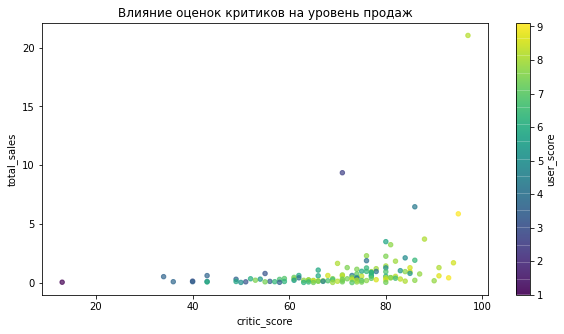

In [39]:
# построим гистограмму рассеяния по данным влияния критиков на продажи
df_select.plot.scatter('critic_score',  'total_sales', figsize=(10, 5), alpha=0.7, c='user_score',colormap='viridis', sharex=False)
plt.xlabel('critic_score')
plt.ylabel('total_sales')
plt.title('Влияние оценок критиков на уровень продаж')
plt.show()

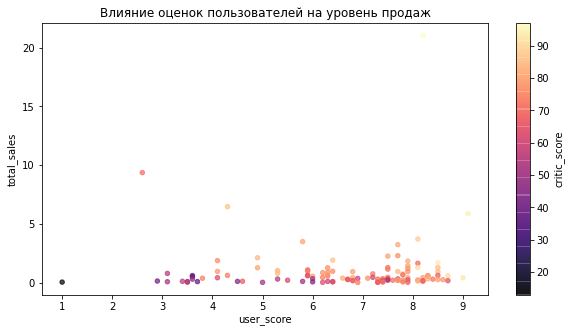

In [40]:
#построим гистограмму рассеяния по данным влияния пользователей на продажи
df_select.plot.scatter('user_score', 'total_sales', figsize=(10, 5), alpha=0.7, c='critic_score', colormap='magma', sharex=False)
plt.xlabel('user_score')
plt.ylabel('total_sales')
plt.title('Влияние оценок пользователей на уровень продаж')
plt.show()

Распределение у критиков ожидаемое, хотя и не линейное - чем выше оценка критиков, тем выше продажи, корреляция положительная между оценками критиков и продажами хоть и не высокая, а между продажами и оценками пользователей корреляция обратная. Также игры с высоким рейтингом у критиков зачастую имеют средние оценки пользователей - и корреляция между оценками средняя. Но при прогнозе продаж лучше обратить внимание на отзывы критиков, но и пользователей не оставлять без внимания.

Рассмотрим величину корреляции других популярных платформ.

In [41]:
#При помощи цикла расчитаем величину корреляции
for p in ["PC", "X360", "3DS", "Wii"]:
    print(p)
    df_select = df.query('platform == @p')
    print('Корреляция между оценкой критиков и продажами:', df_select.critic_score.corr(df_select.total_sales))
    print('Корреляция между оценкой пользователей и продажами:', df_select.user_score.corr(df_select.total_sales))
    print('Корреляция между оценками критиков и пользователей:', df_select.critic_score.corr(df_select.user_score))
    print('*')

PC
Корреляция между оценкой критиков и продажами: 0.257394718400985
Корреляция между оценкой пользователей и продажами: 0.012904741611451175
Корреляция между оценками критиков и пользователей: 0.5551985871878921
*
X360
Корреляция между оценкой критиков и продажами: 0.39286589254006954
Корреляция между оценкой пользователей и продажами: 0.11418661214018049
Корреляция между оценками критиков и пользователей: 0.6250204504122275
*
3DS
Корреляция между оценкой критиков и продажами: 0.3487397305984834
Корреляция между оценкой пользователей и продажами: 0.22207843643390882
Корреляция между оценками критиков и пользователей: 0.7452221337984232
*
Wii
Корреляция между оценкой критиков и продажами: 0.17790728577594908
Корреляция между оценкой пользователей и продажами: 0.11283121360773772
Корреляция между оценками критиков и пользователей: 0.6882854908327511
*


Значения корреляций различаются, но общий вывод можно сделать.

Оценка критиков немного сильнее коррелирует с продажами, хотя эта связь и не является сильной.

Корреляция оценок пользователей и продаж совсем слабая. Возможно, это связано и с тем, что далеко не все пользователи пишут отзывы и оставляют оценки.

**Посмотрим на общее распределение игр по жанрам.**

In [70]:
genre_sales = df_actual.pivot_table(index='genre', values='total_sales', columns = 'year_of_release', aggfunc = 'sum', fill_value=0, margins=True).reset_index()
genre_sales = genre_sales[:-1]
genre_sales = genre_sales.rename_axis('index',  axis="columns").set_index('genre').sort_values(by='All', ascending=False)

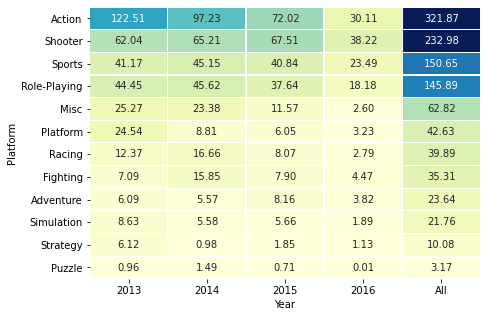

In [71]:
plt.figure(figsize=(7, 5))
sns.heatmap(genre_sales, annot=True, fmt=".2f", cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.xlabel('Year')
plt.ylabel('Platform')
plt.show()

Самые популярные жанры это shooter и action скорее всего так сложилось исторически что даные жанры в топе. Построим для них графики продаж по годам.

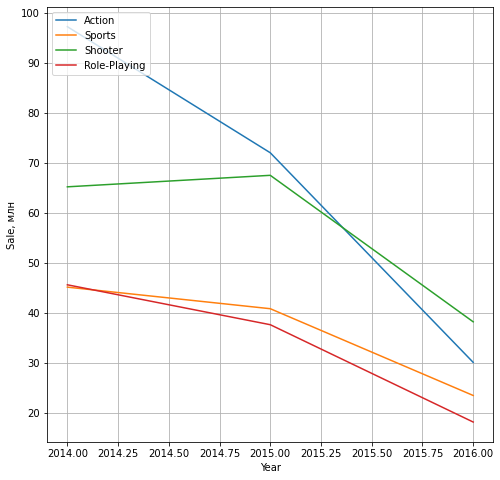

In [72]:
plt.figure(figsize=(8, 8))
for i in ['Action', 'Sports', 'Shooter', 'Role-Playing']:
    plt.plot(genre_sales.loc[i, list(genre_sales.columns[1:-1])].T, label=i)
plt.xlabel('Year')
plt.ylabel('Sale, млн')
plt.grid()
plt.legend(loc='upper left')
plt.show()

Изменение популярности жанров в целом совпадает с тенденциями рынка их пики  продаж пришлись на вторую половину нулевых, а в последние 6 лет в игровой индустрии наблюдается стагнация. 

Построим диаграммы размаха для всех жанров за последние 7 лет.

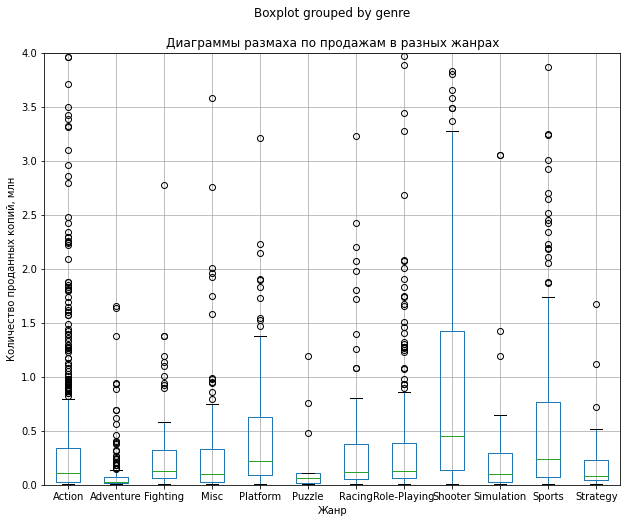

In [73]:
 (df_actual[['total_sales', 'genre']].boxplot(column='total_sales', by='genre', figsize=(10,8))
)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам в разных жанрах')
#Из-за многочисленных выбросов сложно разглядеть сами ящики, изменим масштаб графика
plt.ylim(0, 4)
plt.show()

In [74]:
#Соберем эти данные в табличку 
display(df_actual
        .pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'mean', 'median', 'std', 'count'])
        .reset_index().sort_values(('median', 'total_sales'), ascending=False))

,genre,sum,mean,median,std,count
,,total_sales,total_sales,total_sales,total_sales,total_sales
8,Shooter,232.98,1.245882,0.450,2.014107,187
10,Sports,150.65,0.703972,0.240,1.219237,214
4,Platform,42.63,0.576081,0.225,0.806808,74
7,Role-Playing,145.89,0.499623,0.125,1.353164,292
2,Fighting,35.31,0.441375,0.125,1.048883,80
6,Racing,39.89,0.469294,0.120,0.964101,85
0,Action,321.87,0.420196,0.110,1.253909,766
9,Simulation,21.76,0.350968,0.100,0.849163,62
3,Misc,62.82,0.405290,0.100,1.007985,155


Из этих данных видно, что экшны лидеры по количеству релизов и валовым продажам, но по медианым продажам даже не входят в пятерку, шутеры в лидерах и по средним продажам, и по доле бестселлеров среди выпущенных игр.  Также среди лидеров спортивные игры и платформеры.

**Вывод**
В среднем жизненный цикл платформы составляет около 7 лет. 

На данный момент среди консолей PlayStation 4, WiiU, XBox One находятся на подъеме, Nintendo 3DS, XBox 360, PlayStation 3 и PlayStation Vita миновали пик популярности. 
Персональные компьютеры, никогда не являясь лидерами по продажам и занимают небольшую стабильную нишу. 

Наиболее популярными жанрами являются спортивные игры, шутеры, платформеры и RPG. Несмотря на огромное количество релизов, экшены не являются лидерами по продажам и редко "выстреливают".

**Шаг 4. Составим портрет пользователя каждого региона**

Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [44]:
# создадим сводную таблицу продаж в регионе JP по платформам
top5_platform_jp = (df_actual.pivot_table(index='platform', values=['jp_sales', 'total_sales'], aggfunc='sum')
                    .sort_values(by='jp_sales', ascending=False).head(5))
# добавим столбец с рассчитаной долей продаж от общей по каждой платформе
top5_platform_jp['proportion'] = (top5_platform_jp['jp_sales'] / top5_platform_jp['total_sales'] *100).round(2)
top5_platform_jp

,jp_sales,total_sales,proportion
platform,,,
3DS,67.81,143.25,47.34
PS3,23.35,181.43,12.87
PSV,18.59,32.99,56.35
PS4,15.96,314.14,5.08
WiiU,10.88,64.63,16.83


In [45]:
# создадим сводную таблицу продаж в регионе NA по платформам
top5_platform_na = (df_actual.pivot_table(index='platform', values=['na_sales', 'total_sales'], aggfunc='sum')
                    .sort_values(by='na_sales', ascending=False).head(5))
# добавим столбец с рассчитаной долей продаж от общей по каждой платформе
top5_platform_na['proportion'] = (top5_platform_na['na_sales'] / top5_platform_na['total_sales'] *100).round(2)
top5_platform_na

,na_sales,total_sales,proportion
platform,,,
PS4,108.74,314.14,34.62
XOne,93.12,159.32,58.45
X360,81.66,136.80,59.69
PS3,63.50,181.43,35.00
3DS,38.20,143.25,26.67


In [46]:
# создадим сводную таблицу продаж в регионе EU по платформам
top5_platform_eu = (df_actual.pivot_table(index='platform', values=['eu_sales', 'total_sales'], aggfunc='sum')
                    .sort_values(by='eu_sales', ascending=False).head(5))
# добавим столбец с рассчитаной долей продаж от общей по каждой платформе
top5_platform_eu['proportion'] = (top5_platform_eu['eu_sales'] / top5_platform_eu['total_sales'] *100).round(2)
top5_platform_eu

,eu_sales,total_sales,proportion
platform,,,
PS4,141.09,314.14,44.91
PS3,67.81,181.43,37.38
XOne,51.59,159.32,32.38
X360,42.52,136.80,31.08
3DS,30.96,143.25,21.61


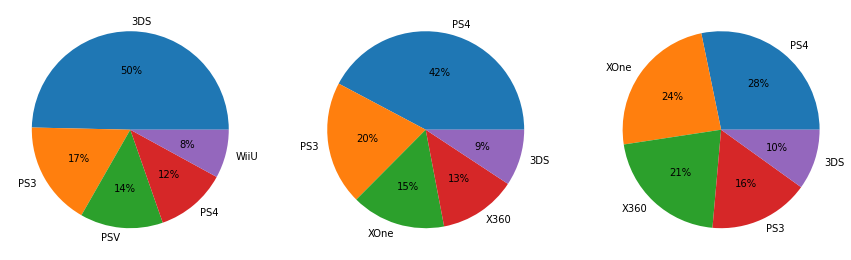

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].pie(top5_platform_jp['jp_sales'], labels = top5_platform_jp.index, autopct='%.0f%%');

axs[1].pie(top5_platform_eu['eu_sales'], labels = top5_platform_eu.index, autopct='%.0f%%');

axs[2].pie(top5_platform_na['na_sales'], labels = top5_platform_na.index, autopct='%.0f%%');

В Европе и Северной Америке топ плаформ состоит из одинаковых консолей в разном порядке - XBox 360, XOne, PlayStation 4 и 3DS. И там, и там относительно свежая PlayStation4 уже набрала популярность и охватывает больший процент пользователей. В Японии преобладают мобильные консоли и консоли от Sony.Американских консолей нет в топе, и продаж игр для ПК в Японии нет совсем.

Самые популярные жанры (топ-5).

In [48]:
# создадим сводную таблицу продаж в регионе jp по жанрам
top5_genre_jp = (df_actual.pivot_table(index='genre', values=['jp_sales', 'total_sales'], aggfunc='sum')
                    .sort_values(by='jp_sales', ascending=False).head(5))
top5_genre_jp

,jp_sales,total_sales
genre,,
Role-Playing,51.04,145.89
Action,40.49,321.87
Misc,9.20,62.82
Fighting,7.65,35.31
Shooter,6.61,232.98


In [49]:
# создадим сводную таблицу продаж в регионе na по жанрам
top5_genre_na = (df_actual.pivot_table(index='genre', values=['na_sales', 'total_sales'], aggfunc='sum')
                    .sort_values(by='na_sales', ascending=False).head(5))
top5_genre_na

,na_sales,total_sales
genre,,
Action,126.05,321.87
Shooter,109.74,232.98
Sports,65.27,150.65
Role-Playing,46.40,145.89
Misc,27.49,62.82


In [50]:
# создадим сводную таблицу продаж в регионе EU по жанрам
top5_genre_eu = (df_actual.pivot_table(index='genre', values=['eu_sales', 'total_sales'], aggfunc='sum')
                    .sort_values(by='eu_sales', ascending=False).head(5))
top5_genre_eu

,eu_sales,total_sales
genre,,
Action,118.13,321.87
Shooter,87.86,232.98
Sports,60.52,150.65
Role-Playing,36.97,145.89
Racing,20.19,39.89


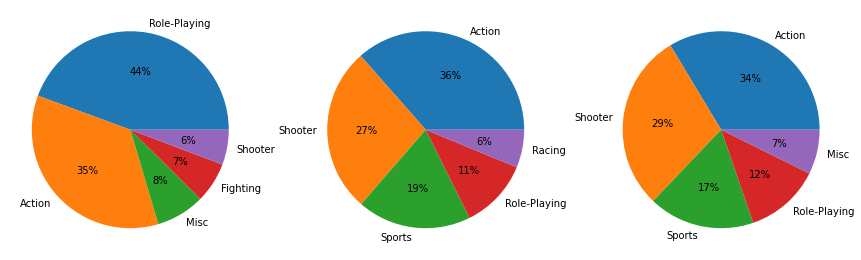

In [51]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].pie(top5_genre_jp['jp_sales'], labels = top5_genre_jp.index, autopct='%.0f%%');

axs[1].pie(top5_genre_eu['eu_sales'], labels = top5_genre_eu.index, autopct='%.0f%%');

axs[2].pie(top5_genre_na['na_sales'], labels = top5_genre_na.index, autopct='%.0f%%');

В Европе и Северной Америке на первом месте экшен игры,на втором спортивные игры и на третьем шутеры, далее РПГ. В Японии лидер РПГ, экшен игры на втором месте, а шутеры всего на 5 месте.

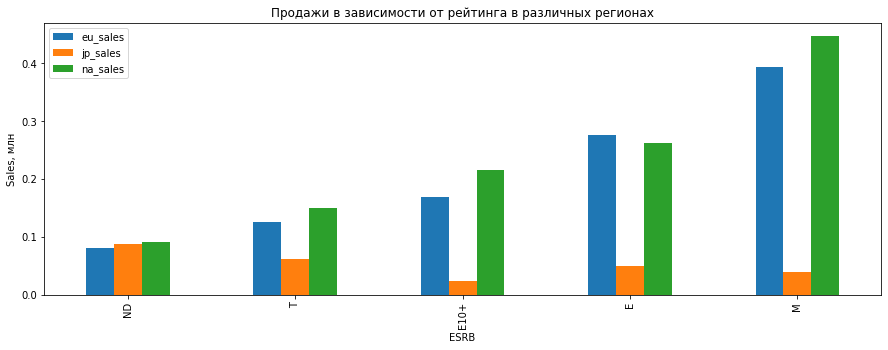

In [52]:
# создадим сводную таблицу продаж по жанрам и построим график
(
    df_actual.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='mean')
    .sort_values(by='na_sales')
    .plot(kind='bar', figsize=(15, 5))
)
plt.xlabel('ESRB')
plt.ylabel('Sales, млн')
plt.title('Продажи в зависимости от рейтинга в различных регионах')
plt.show()

Топ самых продаваемых категорий в Америке и Европе совпадает. Чаще продаются игры с рейтингом "для взрослых старше 16 лет". Далее идут игры которые могут подойти как детям, так и взрослым, затем игры для школьников и подростков.

Рейтинг ESRB предназначен для рецензирования игр на территории Северной Америки (США, Канады, Мексики). Поэтому в Японии так популярны игры вовсе без этого рейтинга. Скорее всего это игры которые разрабоали в Японии и не получили ограничения рейтинга, но популярны в стране производства.

**Вывод**

Регион влияет на то, какие жанры популярны, и какие платформы предпочтительнее. В Европе и Северной Америке лидеры практически не отличаются. Наиболее популярны стационарные платформы (XBox 360, XOne, PlayStation 3 и PlayStation 4). В Японии наоборот предпочитают мобильные консоли (Nintendo 3DS и PlayStation Vita), но и стационарные PlayStation 3 и PlayStation 4 есть в топе. А вот продажи ПК игр в Японии, согласно имеющимся данным, отсутствуют. В Европе и Северной Америке на первых местах экшен, спортивные игры и шутеры. В Японии экшен только на втором месте по поулярности, самое популярный жанр RPG, а шутеры на последнем месте.

**Шаг 5. Проверьте гипотезы**

**Гипотеза 1**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

H0 - средние рейтинги не отличаются.
H1 - средние пользовательские рейтинги отличаются.

Значение критического уровня вероятности (альфа) примем равным 5%.
Пропущенные значечния отфильтруем.

In [53]:
# критический уровень статистической значимости
alpha = 0.05  

results = st.ttest_ind(
    df_actual[(df_actual.platform == "XOne") & (df_actual.user_score.notna())]['user_score'], 
    df_actual[(df_actual.platform == "PC") & (df_actual.user_score.notna())]['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу!')
else:
    print('Отвергнуть нулевую гипотезу не получилось!') 

p-значение: 0.14012658403611647
Отвергнуть нулевую гипотезу не получилось!


**Гипотеза 2**

Отличаются ли средние пользовательские рейтинги жанров Экшен и Спорт.

H0 - средние рейтинги не отличаются.
H1 - средние пользовательские рейтинги отличаются.

Значение критического уровня вероятности (альфа) примем равным 5%.
Пропущенные значечния отфильтруем.

In [54]:
# критический уровень статистической значимости
alpha = 0.05  

results = st.ttest_ind(
    df_actual[(df_actual.genre == "Action") & (df_actual.user_score.notna())]['user_score'], 
    df_actual[(df_actual.genre == "Sports") & (df_actual.user_score.notna())]['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу!')
else:
    print('Отвергнуть нулевую гипотезу не получилось!')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу!


**Вывод**

Платформы не влияют на среднюю оценку пользователей, но оненка зависит от жанра игры. На основании принятого нами значения критического уровня статистической значимости в 5% мы можем предполагать, что первая гипотеза верна, а вторая нет.

**Общий вывод**

После изучения данных о выдеоиграх, вышедших в период с 1980 года по 2016 год, на консолях и ПК мы можем предположить о том какие игры будут хорошо продаваться в 2017 году и составили портреты пользователей различных регионов. 

На момент 2016 года  PlayStation 4, WiiU, XBox One увеличивают свое количество, в то время как у Nintendo 3DS, XBox360, PS 3 и PS Vita уже наблюдается спад популярности. 

Самые продаваемые жанры это шутеры, RPG, спортивные игры и платформеры.

Региональные различия оказывают заметное влияние на выбор пользователя игровых платформ и жанров.

Северная Америка и Европа схожи между собой, а Япония заметно отличается.

Наиболее популярными платформами в Северной Америке и Европе являются стационарные консоли - XBox 360, XOne, PlayStation 3 и PlayStation 4. В Японии чаще используют мобильную консоль - Nintendo 3DS, а стационарные консоли уже на втором месте.

Экшен, спортивные игры и шутеры наиболее популярны в Европе и Америке. В Японии экшен на втором месте, а лидеры - RPG. 

Так как рейтинг ESRB предназначен для рецензирования игр на территории Северной Америки (США, Канады, Мексики), заметнее его влияние в этом регионе и Европе. В Японии популярны игры без ESRB рейтинга. Скорее всего это игры, созданные в самой Японии и не получавшие этого рейтинга. 

Количество проданных игр больше зависит от оценок критиков, чем от оценок пользователей. btw оценки пользователей больше зависят от жанра.
